In [39]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

In [3]:
#load mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#normalize the data
x_train = (x_train.astype("float32")) / 255.0
x_test = (x_test.astype("float32")) / 255.0

#reshape the data to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28,28,1))
x_test = x_test.reshape((x_test.shape[0], 28,28,1))

In [5]:
#build the model
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(32, (3,3), activation="relu"))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [6]:
#create the model
model = KerasClassifier(build_fn=create_model)

In [7]:
#grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 20, 30]

param_grid = dict(batch_size=batch_size, epochs=epochs)

In [8]:
#n_jobs = process will use all cores on the machine
#cv = use 3 fold grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=2)

In [9]:
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 31.3min finished


Epoch 1/30
3000/3000 [==============================] - 9s 2ms/step - loss: 0.2933 - accuracy: 0.9091
Epoch 2/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0495 - accuracy: 0.9853
Epoch 3/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0331 - accuracy: 0.9898
Epoch 4/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0223 - accuracy: 0.9926
Epoch 5/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0157 - accuracy: 0.9952
Epoch 6/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0133 - accuracy: 0.9953
Epoch 7/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0092 - accuracy: 0.9971
Epoch 8/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0076 - accuracy: 0.9975
Epoch 9/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0075 - accuracy: 0.9974
Epoch 10/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.006

In [10]:
print(grid_result.best_score_, grid_result.best_params_)

0.9887333313624064 {'batch_size': 20, 'epochs': 30}


In [20]:
#build the model
def create_model_optimizer(optimizer="Adam"):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(32, (3,3), activation="relu"))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [21]:
#Model for optimizer optimization
model_optimizer = KerasClassifier(build_fn=create_model_optimizer, epochs=30, batch_size=20)
optimizer = ["SGD", "RMSprop", "Adagrad", "Adadelta", "Adam", "Adamax", "Nadam"]
param_grid_optimizer = dict(optimizer=optimizer)
grid_optimizer = GridSearchCV(estimator=model_optimizer, param_grid=param_grid_optimizer, cv=3, n_jobs=-1, verbose=2)
grid_optimizer_result = grid_optimizer.fit(x_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 34.4min finished


Epoch 1/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2959 - accuracy: 0.9101
Epoch 2/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0483 - accuracy: 0.9852
Epoch 3/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0334 - accuracy: 0.9894
Epoch 4/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0241 - accuracy: 0.9921
Epoch 5/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0184 - accuracy: 0.9932
Epoch 6/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 7/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0129 - accuracy: 0.9960
Epoch 8/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0096 - accuracy: 0.9967
Epoch 9/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 10/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.006

In [22]:
print(grid_optimizer_result.best_score_, grid_optimizer_result.best_params_)

0.9891833464304606 {'optimizer': 'Adam'}


In [26]:
#build the model
def create_model_lr(learning_rate=0.01):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(32, (3,3), activation="relu"))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [27]:
#Model for learning rate optimization
model_lr = KerasClassifier(build_fn=create_model_lr, epochs=30, batch_size=20)
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
#momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid_lr = dict(learning_rate=learning_rate)
grid_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=3, n_jobs=-1, verbose=2)
grid_lr_result = grid_lr.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 22.6min finished


Epoch 1/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.3020 - accuracy: 0.9110
Epoch 2/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0472 - accuracy: 0.9859
Epoch 3/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0330 - accuracy: 0.9899
Epoch 4/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 5/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0161 - accuracy: 0.9947
Epoch 6/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0126 - accuracy: 0.9960
Epoch 7/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0104 - accuracy: 0.9968
Epoch 8/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0085 - accuracy: 0.9968
Epoch 9/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 10/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.006

In [28]:
print(grid_lr_result.best_score_, grid_lr_result.best_params_)

0.9888000090916952 {'learning_rate': 0.001}


In [32]:
#build final model
final_model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")                             
])

In [34]:
final_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [35]:
#compile finale model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
final_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [36]:
#train the model
batch_size = 20
epochs = 30
history = final_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
3000/3000 [==============================] - 8s 2ms/step - loss: 0.2999 - accuracy: 0.9084 - val_loss: 0.0610 - val_accuracy: 0.9799
Epoch 2/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0318 - val_accuracy: 0.9898
Epoch 3/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0305 - accuracy: 0.9910 - val_loss: 0.0333 - val_accuracy: 0.9888
Epoch 4/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0198 - accuracy: 0.9932 - val_loss: 0.0345 - val_accuracy: 0.9888
Epoch 5/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.0352 - val_accuracy: 0.9893
Epoch 6/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0319 - val_accuracy: 0.9905
Epoch 7/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.0312 - val_accuracy:

In [38]:
accuracy = history.history["accuracy"]
loss = history.history["loss"]
val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

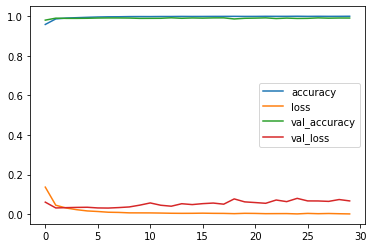

In [43]:
plt.plot(accuracy, label="accuracy")
plt.plot(loss, label="loss")
plt.plot(val_accuracy, label="val_accuracy")
plt.plot(val_loss, label="val_loss")
plt.legend()